# Introduction to regression with neural networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combinations of variables, even shorter... predicting a number.

In [ ]:
#We need to install tf version 2.15 for compatibility with this notebook (written in March 2024).
!pip install tensorflow==2.15.0

In [3]:
# import tensorflow
import tensorflow as tf
print(tf.__version__)

2.15.0


Creating data to view and fit

In [4]:
import numpy as np
import matplotlib.pyplot as plt

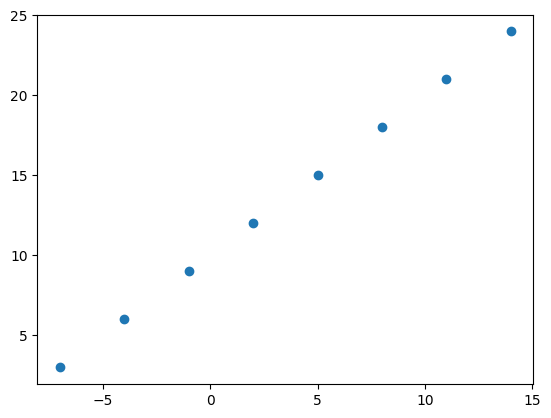

In [5]:
#Create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

#Create labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0, 21.0, 24.0])

#Visualize it
plt.scatter(X,y)

In [6]:
X + 10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [7]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [8]:
#Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([937900])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([937900], dtype=int32)>)

In [9]:
X[0],y[0]

(-7.0, 3.0)

In [10]:
X[1],y[1]

(-4.0, 6.0)

In [11]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [12]:
X[0].ndim

0

In [13]:
#Turn our numpy arrays into tensors with dtype=float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X,y

input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

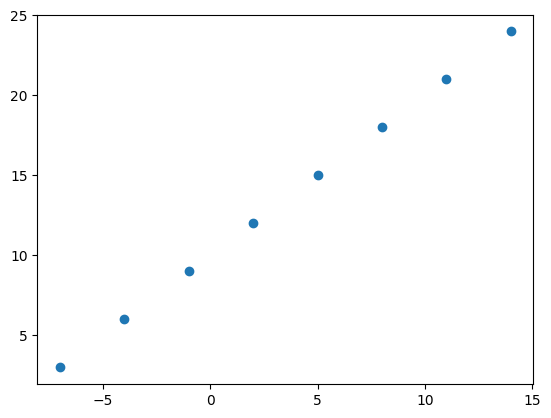

In [14]:
plt.scatter(X, y)

##Steps in modelling with TensorFlow

# 1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep
# 2. **Compile a model** - define the loss function (in other words, the function which tells our model how wrong it is), and the optimizer
#. Optimizer tells our model how to improve the pattern it is learning) and evaluation metrics (what we can use to interpret the performance
# of our model)
# 3. **Fitting our model**.  Letting hte model find patterns between x and Y (features and labels)

In [15]:
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, #mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), #SGD is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
#model.fit(X, y, epochs = 5)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 19.6290 - mae: 19.6290
Epoch 2/5
1/1 [==============================] - 0s 20ms/step - loss: 19.3478 - mae: 19.3478
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 19.0665 - mae: 19.0665
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 18.7853 - mae: 18.7853
Epoch 5/5
1/1 [==============================] - 0s 28ms/step - loss: 18.5040 - mae: 18.5040


In [16]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [17]:
#Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 270ms/step


array([[-17.774946]], dtype=float32)

##Improving our model
We can improve our model by altering hte steps we took in creating the model
1. Create the model - add more layers... increase number of hidden units (neurons) within each of hidden layers... change activation functions of each layer
2. When compiling a model, here we might change optimization function or perhaps learning rate of said optimization function.
3. When fitting a model, here we might fit a model for more epochs (let model look at training data... leave it training for longer... or on more data.  Give model more examples to learn from).

In [18]:
#Lets recreate our model
#1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae, #mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), #SGD is short for stochastic gradient descent
              metrics=["mae"])

#3. Fit the model
#this time we train for longer
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 16.6266 - mae: 16.6266
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 16.3453 - mae: 16.3453
Epoch 3/100
1/1 [==============================] - 0s 22ms/step - loss: 16.0641 - mae: 16.0641
Epoch 4/100
1/1 [==============================] - 0s 33ms/step - loss: 15.7828 - mae: 15.7828
Epoch 5/100
1/1 [==============================] - 0s 53ms/step - loss: 15.5016 - mae: 15.5016
Epoch 6/100
1/1 [==============================] - 0s 31ms/step - loss: 15.2203 - mae: 15.2203
Epoch 7/100
1/1 [==============================] - 0s 40ms/step - loss: 14.9391 - mae: 14.9391
Epoch 8/100
1/1 [==============================] - 0s 18ms/step - loss: 14.7456 - mae: 14.7456
Epoch 9/100
1/1 [==============================] - 0s 23ms/step - loss: 14.6131 - mae: 14.6131
Epoch 10/100
1/1 [==============================] - 0s 60ms/step - loss: 14.4806 - mae: 14.4806
Epoch 11/100
1/1 [==============================] -

In [19]:
#Reminder ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [20]:
#Lets see if our model's prediction has improved
model.predict([17.0])

1/1 [==============================] - 0s 169ms/step


array([[29.69724]], dtype=float32)

In [21]:
#Lets recreate our model
#1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae, #mae is short for mean absolute error
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), #SGD is short for stochastic gradient descent
              metrics=["mae"])

#3. Fit the model
#this time we train for longer
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 15.0942 - mae: 15.0942
Epoch 2/100
1/1 [==============================] - 0s 30ms/step - loss: 14.9990 - mae: 14.9990
Epoch 3/100
1/1 [==============================] - 0s 20ms/step - loss: 14.9266 - mae: 14.9266
Epoch 4/100
1/1 [==============================] - 0s 19ms/step - loss: 14.8602 - mae: 14.8602
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 14.7946 - mae: 14.7946
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 14.7292 - mae: 14.7292
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 14.6641 - mae: 14.6641
Epoch 8/100
1/1 [==============================] - 0s 27ms/step - loss: 14.5990 - mae: 14.5990
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 14.5341 - mae: 14.5341
Epoch 10/100
1/1 [==============================] - 0s 18ms/step - loss: 14.4691 - mae: 14.4691
Epoch 11/100
1/1 [==============================] -

In [22]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [23]:
model.predict([17.0])

1/1 [==============================] - 1s 516ms/step


array([[23.190641]], dtype=float32)

In [24]:
# Lets see if we can make another to improve our model
# 1. Create the model (this time with an extra hidden layer with 100 hidden units)

In [25]:
# The learning rate is often the most important hyperparameter of many different neural networks



** Evaluating a model **

In [26]:
# In practice, a typical workflow you will go thru when building neural networks:
# Build a model -> Fit it -> Evaulate it -> Tweak it
# Fit it -> evaluate it -> tweak a model...

In [27]:
# When it comes to evaluating models, there are 3 words to memorize:
# Visualize, visualize, visualize
# It's a good idea to visualize:
# *The data: what data are we working with?  What does it look like?
# *The training of a model: the way that a model looks at the data
# *The predictions of the model: how do the predictions of a model line up against the ground truth (the original labels)?



In [28]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [29]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

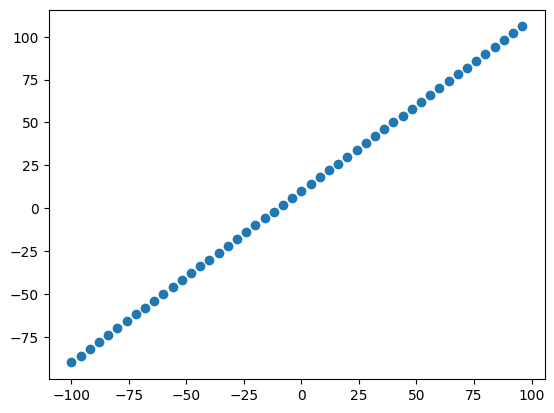

In [30]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

In [31]:
# The 3 sets...

#* 1. The training set (model learns from this data) typically 70/80% of total data available
# 2. The validation set: the model gets tuned on this data (typically 10-15% of data available)
# 3. The test set: the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available

In [32]:
#Lets recreate our model
#1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae, #mae is short for mean absolute error
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), #SGD is short for stochastic gradient descent
              metrics=["mae"])

#3. Fit the model
#this time we train for longer
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
2/2 [==============================] - 3s 14ms/step - loss: 51.3674 - mae: 51.3674
Epoch 2/100
2/2 [==============================] - 0s 14ms/step - loss: 49.7401 - mae: 49.7401
Epoch 3/100
2/2 [==============================] - 0s 17ms/step - loss: 48.3147 - mae: 48.3147
Epoch 4/100
2/2 [==============================] - 0s 16ms/step - loss: 46.7639 - mae: 46.7639
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 45.2213 - mae: 45.2213
Epoch 6/100
2/2 [==============================] - 0s 21ms/step - loss: 43.7090 - mae: 43.7090
Epoch 7/100
2/2 [==============================] - 0s 25ms/step - loss: 42.1246 - mae: 42.1246
Epoch 8/100
2/2 [==============================] - 0s 16ms/step - loss: 40.5998 - mae: 40.5998
Epoch 9/100
2/2 [==============================] - 0s 13ms/step - loss: 39.1757 - mae: 39.1757
Epoch 10/100
2/2 [==============================] - 0s 14ms/step - loss: 37.5948 - mae: 37.5948
Epoch 11/100
2/2 [==============================]

In [33]:
model.predict([100])

1/1 [==============================] - 0s 157ms/step


array([[94.50123]], dtype=float32)

In [34]:
# Check the length of how many samples we have
len(X)

50

In [35]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are training samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [36]:
### Visualizing the data
# Now we have our data in training and test sets.... lets visualize it again


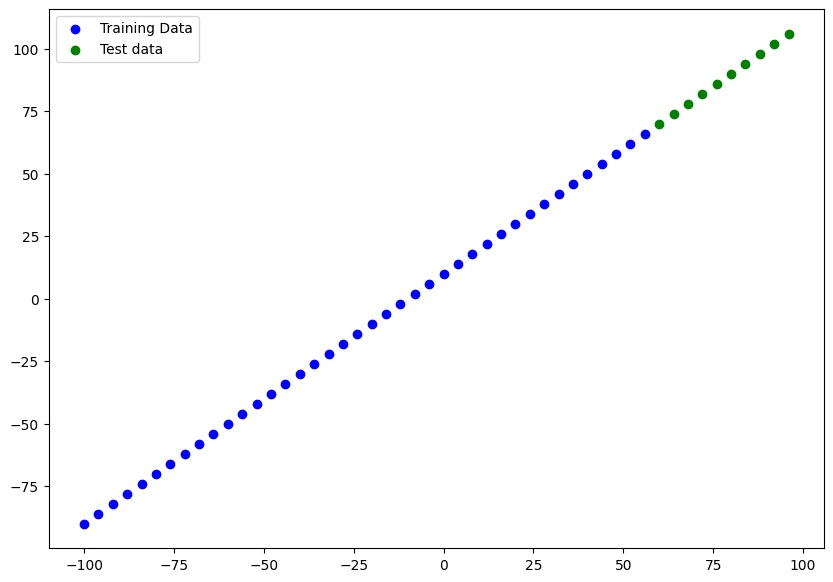

In [37]:
plt.figure(figsize=(10,7))
# plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training Data")
plt.scatter(X_test, y_test, c="g", label="Test data")
#Show a legend
plt.legend();

In [38]:
# Lets have a look at how to build a neural network for our data

#1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model
#model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)



In [39]:
# Visualize the model
#model.summary()

In [40]:
#lets create a model that builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

#1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="one_of_many1")

#2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.summary()

Model: "one_of_many1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
# Total params = Total number of parameters in the model
# Trainable params = these are the parameters (patterns) the mode can update as it trains
# non-trainable params = these parameters arent updated during training (this is typical when you bring in already-learned parameters (patterns) from other models during TRANSFER LEARNING)


📖 ** Resource ** For a more in-depth overview of trainable parameters within a layer, check out MIT's introduction to deep learning video

⚒ ** Exercise ** Try playing around with the number of hidden units in the dense layer, see how that affects the number of parameters (total and trainable) by calling 'model.summary()'


In [42]:
# lets fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 23ms/step - loss: 36.5250 - mae: 36.5250
Epoch 2/100
2/2 [==============================] - 0s 18ms/step - loss: 28.9743 - mae: 28.9743
Epoch 3/100
2/2 [==============================] - 0s 13ms/step - loss: 33.5577 - mae: 33.5577
Epoch 4/100
2/2 [==============================] - 0s 13ms/step - loss: 29.9639 - mae: 29.9639
Epoch 5/100
2/2 [==============================] - 0s 12ms/step - loss: 15.2969 - mae: 15.2969
Epoch 6/100
2/2 [==============================] - 0s 12ms/step - loss: 12.1505 - mae: 12.1505
Epoch 7/100
2/2 [==============================] - 0s 26ms/step - loss: 11.4535 - mae: 11.4535
Epoch 8/100
2/2 [==============================] - 0s 19ms/step - loss: 11.2030 - mae: 11.2030
Epoch 9/100
2/2 [==============================] - 0s 14ms/step - loss: 41.7123 - mae: 41.7123
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 28.9462 - mae: 28.9462
Epoch 11/100
2/2 [==============================] 

In [43]:
model.summary()

Model: "one_of_many1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


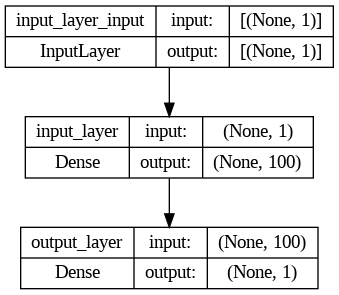

In [44]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

### Visualizing our model's predictions ###

In [45]:
# To visualize predictions, its a good idea to plot them against the ground truth labels
# Often you will see this in the form of y_test or y_true vs. y_pred (ground truth vs. your model)


In [46]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 105ms/step


array([[ 76.40809 ],
       [ 81.38561 ],
       [ 86.36313 ],
       [ 91.34066 ],
       [ 96.318184],
       [101.29572 ],
       [106.27324 ],
       [111.250755],
       [116.22829 ],
       [121.2058  ]], dtype=float32)

In [47]:
# Lets create a plotting function


🔑 ## If you feel you will reuse some function in the future its a good idea to turn it into a function ##

In [48]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  plots training data and test data and compares predictions to ground truth labels
  """
  plt.figure(figsize=(10,7))
  #plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  #Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  #Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  #Show the legend
  plt.legend();

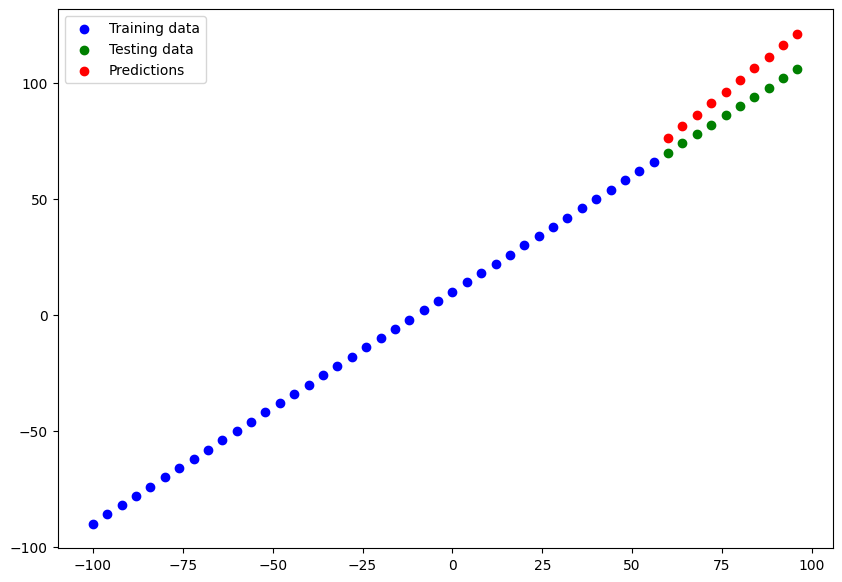

In [49]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you are working on there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error; "on average, how wrong is each of my model's predictions
* MSE - mean square errors; "squre the average errors"


In [50]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 253ms/step - loss: 10.8070 - mae: 10.8070


[10.806950569152832, 10.806950569152832]

In [51]:
# Calculate the mean square error
mae = tf.keras.losses.mae(y_test, tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([13.355146, 11.045755, 10.      , 10.268132, 11.727274, 14.377434,
       18.27324 , 23.250755, 28.228287, 33.205803], dtype=float32)>

In [52]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 76.40809 ],
       [ 81.38561 ],
       [ 86.36313 ],
       [ 91.34066 ],
       [ 96.318184],
       [101.29572 ],
       [106.27324 ],
       [111.250755],
       [116.22829 ],
       [121.2058  ]], dtype=float32)>

In [53]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [54]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 76.40809 ,  81.38561 ,  86.36313 ,  91.34066 ,  96.318184,
       101.29572 , 106.27324 , 111.250755, 116.22829 , 121.2058  ],
      dtype=float32)>

In [55]:
#Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=10.806948>

In [56]:
# Calculate the mean square error
mse = tf.keras.losses.mse(y_true=y_test,
                          y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=124.67345>

In [57]:
# make some functions to reuse MAE and MSE

def mae(y_true, y_pred):
  return(tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred)))

def mse(y_true,y_pred):
  return tf.keras.losses.mse(y_true=y_true, y_pred=tf.squeeze(y_pred))



### Running experiments to improve our model ###
'''
Build a model, fit it, evaluate it, tweak it, fit, evaluate, tweak, fit, etc...
'''

1. Get more data (more examples to train our model on... more opporunities to learn patterns and relationships between features and labels.
2. Make your model larger (use a more complex model) -> this might come in the form of more layers or more hidden units within each layer.
3. Train for longer -> Give your model more of a chance to find more patterns within the data.

Let's do 3 modeling experiments:
1.  `model 1` - same as the original model, 1 layer, but trained for 100 epochs
2. `model 2` - 2 layers, trained for 100 epochs
3. `model 3` - 2 layers, trained for 500 epochs
4. create your own 4 and 5

In [58]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

### Build model 1 ###


In [59]:
# Set random seed
tf.random.set_seed(42)

#1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

#3. Fit the model
# Use expand_dims function for newer TensorFlow version
model_1.fit(tf.expand_dims(X_train, axis=-1),y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 20ms/step - loss: 15.0223 - mae: 15.0223
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 10.8465 - mae: 10.8465
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 11.5336 - mae: 11.5336
Epoch 4/100
2/2 [==============================] - 0s 13ms/step - loss: 9.4209 - mae: 9.4209
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 10.3082 - mae: 10.3082
Epoch 6/100
2/2 [==============================] - 0s 12ms/step - loss: 9.5538 - mae: 9.5538
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 8.6736 - mae: 8.6736
Epoch 8/100
2/2 [==============================] - 0s 16ms/step - loss: 9.0522 - mae: 9.0522
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 19.0113 - mae: 19.0113
Epoch 10/100
2/2 [==============================] - 0s 13ms/step - loss: 10.2581 - mae: 10.2581
Epoch 11/100
2/2 [==============================] - 0s 10ms

1/1 [==============================] - 0s 60ms/step


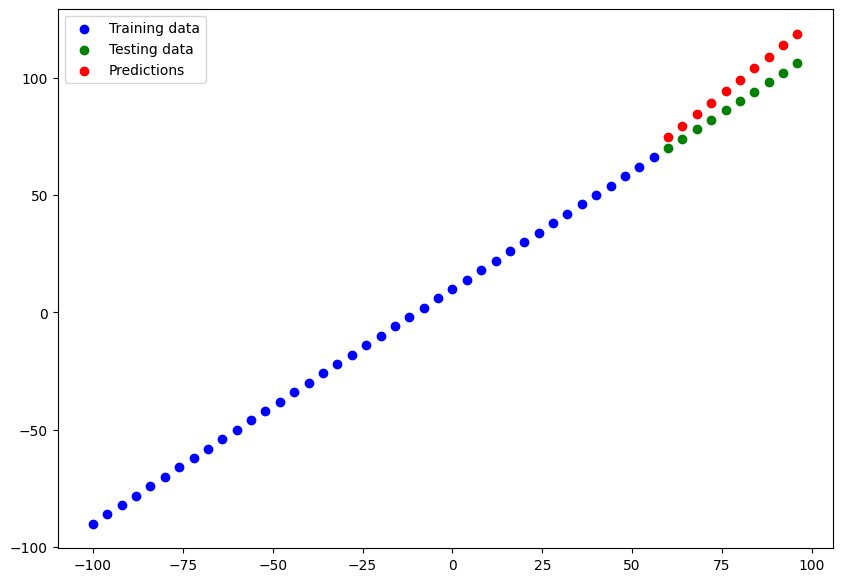

In [60]:
# Make and plot predictions with model_1
y_preds_1 = model_1.predict(X_test)
#y_preds_1
plot_predictions(predictions=y_preds_1)

In [61]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, (y_preds_1))
mse_1 = mse(y_test, (y_preds_1))
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=8.63706>,
 <tf.Tensor: shape=(), dtype=float32, numpy=81.12248>)

** Build `model 2` **
* 2 dense layers, trained for 100 epochs


In [62]:
tf.random.set_seed(42)

#1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

#3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1),y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 14.1592 - mse: 561.3452
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 35.3604 - mse: 1652.2156
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 37.6478 - mse: 2206.3054
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 14.1731 - mse: 289.4672
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 20.1597 - mse: 556.3922
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.1379 - mse: 126.3335
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 15.4583 - mse: 340.1925
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 16.3998 - mse: 349.1170
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 28.1708 - mse: 1091.3722
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 16.0759 - mse: 346.4345
Epoch 11/100
2/2 [============================

1/1 [==============================] - 0s 65ms/step


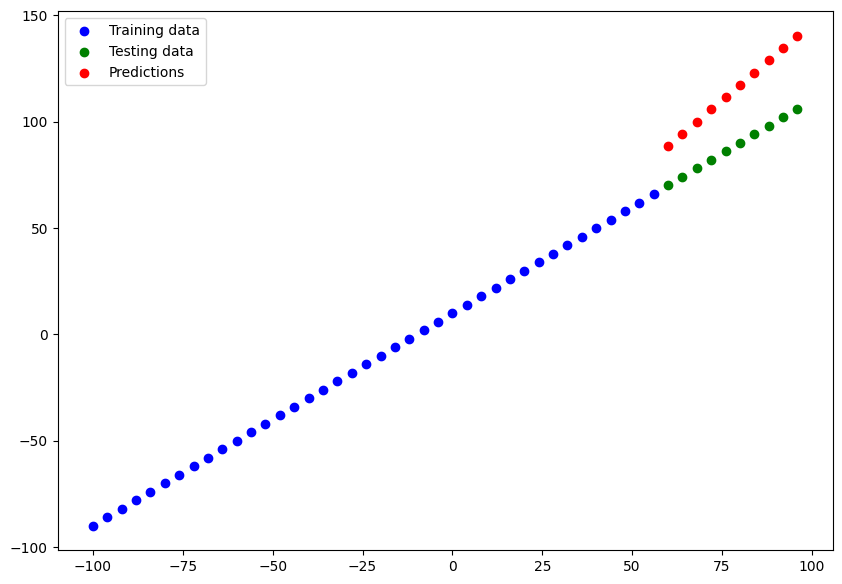

In [63]:
#Make and plot predictions with model 2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [64]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_true=y_test,y_pred=y_preds_2)
mse_2 = mse(y_true=y_test,y_pred=y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=26.417957>,
 <tf.Tensor: shape=(), dtype=float32, numpy=723.82227>)

** Build `model 3` **
*2 layers trained for 500 epochs*


In [65]:
# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1),y_train,epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 13ms/step - loss: 39.7556 - mse: 2201.5127
Epoch 2/500
2/2 [==============================] - 0s 11ms/step - loss: 30.7384 - mse: 1280.7155
Epoch 3/500
2/2 [==============================] - 0s 12ms/step - loss: 36.2038 - mse: 1954.2240
Epoch 4/500
2/2 [==============================] - 0s 14ms/step - loss: 25.3865 - mse: 934.8797
Epoch 5/500
2/2 [==============================] - 0s 10ms/step - loss: 15.0082 - mse: 283.4111
Epoch 6/500
2/2 [==============================] - 0s 10ms/step - loss: 11.9381 - mse: 170.9533
Epoch 7/500
2/2 [==============================] - 0s 15ms/step - loss: 11.2683 - mse: 153.8480
Epoch 8/500
2/2 [==============================] - 0s 14ms/step - loss: 11.1397 - mse: 164.1557
Epoch 9/500
2/2 [==============================] - 0s 15ms/step - loss: 40.9895 - mse: 2660.7222
Epoch 10/500
2/2 [==============================] - 0s 12ms/step - loss: 28.3180 - mse: 1131.1863
Epoch 11/500
2/2 [================

1/1 [==============================] - 0s 72ms/step


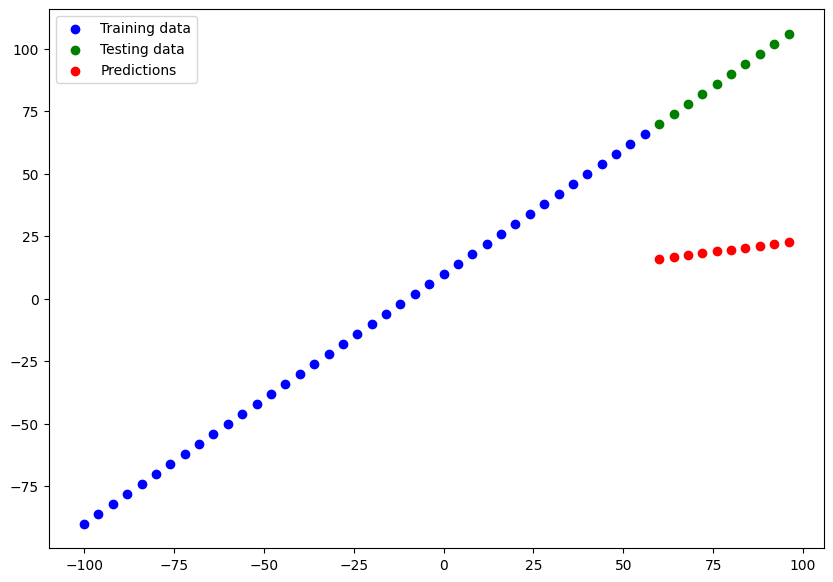

In [66]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [67]:
#Calculate model3 evaluation metrics
mae_3=mae(y_true=y_test,y_pred=y_preds_3)
mse_3=mse(y_true=y_test,y_pred=y_preds_3)
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.688385>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4804.6064>)

** 🔑 You want to start with small experiments and then compare the results **

*** Comparing the results of our experiments ***
We've run a few experiments.  Let's compare the results


In [68]:
# Let's create a panda's data frame.  Compare our results using pandas data frame
import pandas as pd
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,8.637060,81.122482
1,model_2,26.417957,723.822266
2,model_3,68.688385,4804.606445


## Looks like model 2 performed the best

In [69]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


One of your goals should be to minimize the time between experiments.  The more experiments you do, the more things you'll figure out which don't work.  And in turn, get closer to figuring out what does work.  Remember the machine learning practitioner's motto:  experiment, experiment, experiment

## Tracking your experiments

One really good habit in machine learning modeling, is to track the results. ofyour experiments.
It can be tedious when running a lot of experiments.
Luckily, there are tools to help us.

📖 ** Resource:** As you build more models, you'll want to look into using:
* Tensorboard - a component of the tensorflow library to help track modeling experiments (we'll see this one later)
* Weights and biases - a tool for tacking all kinds of weights and biases (plugs straight into tensorflow)

## Saving our models ##

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a mobile app or web app.

There are two main formats we can save our models to:
1. The SavedModel format
2. The HDF5 model

In [70]:
# Save model using the SavedModel format.
model_2.save("Best_Model_SavedModel_format")


In [71]:
# Save model using the HDF5 format
model_2.save("Best_Model_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Loading in a saved model ##

In [72]:
# Load in a SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("Best_Model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [73]:
model_2.summary()
#Compare model_2 predictions with SavedModel format predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 89ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [74]:
mae(y_true=y_test, y_pred=model_2_preds) == mae(y_true=y_test, y_pred=loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [75]:
# Load in. amodel using the H5 model format
loaded_h5_model =tf.keras.models.load_model("Best_Model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [76]:
# Check preidctions
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
loaded_h5_model_preds == model_2_preds

1/1 [==============================] - 0s 117ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file ) from Google Colab

1. If you want to download your files from Google Colab you can go to the Files tab and right click the file you want and click download
2. Use code (see cell below)
3. Save it to Google Drive by connecting Google Drive and copying it there (see 2nd code cell below)

In [77]:
# Download a file from Google Colab
from google.colab import files
files.download("/content/Best_Model_HDF5_format.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [78]:
# Save a file from google colab to google drive
!cp /content/Best_Model_HDF5_format.h5 /content/drive/MyDrive/TensorFlowCourse

cp: cannot create regular file '/content/drive/MyDrive/TensorFlowCourse': No such file or directory


In [79]:
!ls /content/drive/MyDrive/TensorFlowCourse

ls: cannot access '/content/drive/MyDrive/TensorFlowCourse': No such file or directory


## A larger example

In [80]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
# Import insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [82]:
insurance["sex"]

,sex
0,female
1,male
2,male
3,male
4,male
...,...
1333,male
1334,female
1335,female
1336,female


In [83]:
# Lets try to 1hot encode our dataframe so it is all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [84]:
# Create X and y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [85]:
#lets view X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [86]:
#let's view y
y.head()


,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [87]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(y), len(y_train)

(1338, 1070, 1338, 1070)

In [88]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

#1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])


#2. Compile model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(lr=0.2),
                        metrics=["mae"])

#. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)




ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [ ]:
# Check teh results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

In [ ]:
y_train.median(), y_train.mean()

Right now it looks like our model isn't performing too well.  Let's try to improve it.

To try and improve our model let's do 2 experiments.
1. Add an extra layer with more hidden units and use the Adam optimizer
2. Train for longer
3. Insert your own experiment here


In [ ]:
#set random seed
tf.random.set_seed(42)

#Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

#Fit the model
insurance_model_2.fit(X_train,y_train,epochs=100,verbose=1)

In [ ]:
#Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test, )

In [ ]:
insurance_model.evaluate(X_test,y_test)

In [ ]:
#Set random seed
tf.random.set_seed(42)

#Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

#fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200, verbose=1)

In [ ]:
#Evaluate our third model
insurance_model_3.evaluate(X_test, y_test)

In [ ]:
insurance_model.evaluate(X_test, y_test)

In [ ]:
#Plot history (aka loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

** Question: How long should you train for?
It depends.  Really it depends on the problem you are working on.
Many people have asked this question before.  TensorFlor has an answer:
The "EarlyStopping Callback"... a TF component you can add to your model to stop training once it stops improving a certain metric

## Preprocesing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.  

If you're not sure on which to use, you could try both and see which performs better.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

#read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

In [ ]:
X_train, y_train

In [ ]:
X

In [ ]:
X["age"].plot(kind="hist")

In [ ]:
X["bmi"].plot(kind="hist")

In [ ]:
X["children"].value_counts()

To prepare our data, we can borrow a few classes from SciKit Learn

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

#Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), #Turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

#Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [ ]:
# What does our data look like now?
X_train.loc[0]

In [ ]:
X_train_normal[0]

In [ ]:
X_train.shape, X_train_normal.shape,

Beautiful! Our data has been normalized and One Hot Encoded.  Now let's build a neural network model on it and see how it goes.

In [ ]:

#Set random seed
tf.random.set_seed(42)

#Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

#Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                           optimizer=tf.keras.optimizers.SGD(),
                           metrics=["mae"])

#fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100, verbose=1)

In [ ]:
#Set random seed
tf.random.set_seed(42)

#Create the model
insurance_model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(200),
    tf.keras.layers.Dense(200),
    #tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

#Compile the model
insurance_model_5.compile(loss=tf.keras.losses.mae,
                           optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                           metrics=["mae"])

#fit the model
insurance_model_5.fit(X_train_normal, y_train, epochs=100, verbose=1)

In [ ]:
#Evaluate your insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

#insurance_model_2 results:
#9/9 [==============================] - 0s 2ms/step - loss: 4970.4058 - mae: 4970.4058

In [ ]:
'''(X_train, y_train), (X_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)
X_train, y_train, X_test, y_test'''

In [ ]:
'''
# Model based on Boston Housing dataset.

#Set random seed
tf.random_set_seed(42)

#1. Create the model
boston_housing_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
boston_housing_model.compile(loss=tf.keras.losses.mae(),
                             optimizer=tf.keras.optimizers.SGD(),
                             metrics=["mae"])

#3. Fit the model
boston_housing.model.fit()
'''